In [1]:
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import pandas as pd
import os
from os import listdir
import cv2
from PIL import Image
from tqdm import tqdm
%matplotlib inline

In [2]:
import torch
import torchvision.transforms.functional as F

In [3]:
os.chdir('G:\major_project')

In [58]:
cells = os.listdir("data/cell/")
cells.extend(os.listdir('./validation_cells/'))
cells.extend(os.listdir('./test_cells/'))

In [59]:
len(cells)

108585

In [ ]:
##Checking category wise images

In [6]:
labels = pd.read_csv('./train.csv') #original train csv

In [ ]:
img = []
for i in cells:
    try:
        x = i.split(".")[0]
        label =labels[labels['ID'] == x].iloc[0,1]
        img.append(label)
    except:
        print(i)

In [15]:
len(img)

108453

In [25]:
df = pd.DataFrame(pd.Series(img).value_counts()).reset_index()

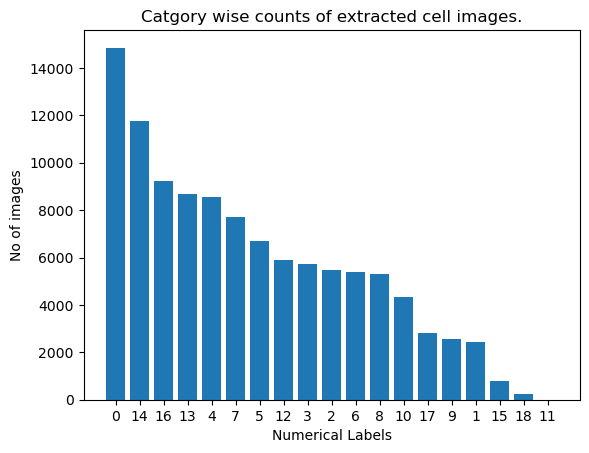

In [41]:
plt.bar(df['labels'], df['count'])
plt.title("Catgory wise counts of extracted cell images.")
plt.xlabel("Numerical Labels")
plt.ylabel("No of images")
plt.savefig('counts.png')
plt.show()

In [37]:
df=  df.rename(columns={'index':'labels'})

In [39]:
df.tail()

,labels,count
14,9,2583
15,1,2425
16,15,769
17,18,239
18,11,6


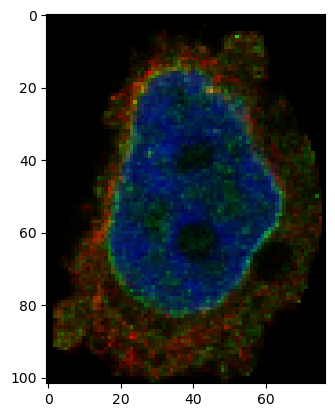

In [11]:
image = cv2.imread('./data/cell/000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._1.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2.imshow('imag', image)
# cv2.waitKey(0)
plt.imshow(img)

In [ ]:
#function to resize images without loosing aspect ratio

In [6]:
def resize_image(image, target_size=(224, 224)):
  height, width, channels = image.shape
  max_dim = max(height, width)
  scale = target_size[0] / max_dim
  new_height = int(height * scale)
  new_width = int(width * scale)
  resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

  # Pad the resized image with zeros to maintain the target size
  pad_height = target_size[0] - new_height
  pad_width = target_size[1] - new_width
  top, bottom = pad_height // 2, pad_height - (pad_height // 2)
  left, right = pad_width // 2, pad_width - (pad_width // 2)
  padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
  return padded_image


In [37]:
resized_image = resize_image(image)
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

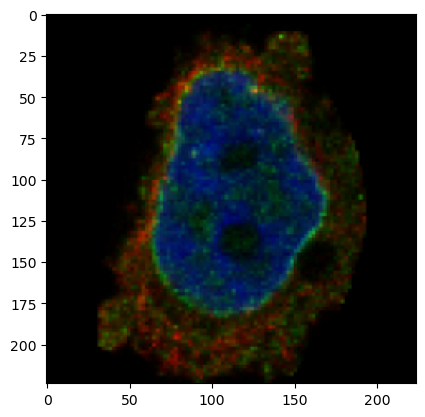

In [42]:
plt.imshow(resized_image)

In [ ]:
#if you want to save data of different labels in different directory code below will do it.

In [5]:
labels = pd.read_csv('final_labels.csv')

In [6]:
names = labels.Label.unique()

In [7]:
for i in names:
    os.mkdir(f'.\data2\{i}')

In [7]:
os.listdir('./data/cell')

['000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._0.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._1.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._2.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._3.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._4.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._5.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._6.png',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._7.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._0.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._1.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._10.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._11.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._12.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._13.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._14.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._15.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._16.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._2.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._3.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0._4.png',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6

In [ ]:
for i in os.listdir('./data/cell/'):
    try:
        name = i.split('.')[0]
        cat = labels[labels['ID']==name].iloc[0,1]
        img = cv2.imread(f'./data/cells/{i}')
        resized_image = resize_image(img)
        img = resized_image.astype(np.float32)
        # cv2.imshow('img', img)
        # cv2.waitKey(0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255
        plt.imsave(f'./data2/{cat}/{i}', img)
        # shutil.copy(f'.\data\cell\{i}',f'.\data2\{cat}')
    except:
        print(i)

In [5]:
labels = pd.read_csv('validation.csv')

In [ ]:
names = labels.Label.unique()
for i in names:
    os.mkdir(f'.\\validation1\\{i}')

In [ ]:
for i in os.listdir('./validation_cells/'):
    try:
        name = i.split('.')[0]
        cat = labels[labels['ID']==name].iloc[0,1]
        img = cv2.imread(f'./validation_cells/{i}')
        resized_image = resize_image(img)
        img = resized_image.astype(np.float32)
        # cv2.imshow('img', img)
        # cv2.waitKey(0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255
        plt.imsave(f'./validation1/{cat}/{i}', img)
        # shutil.copy(f'.\data\cell\{i}',f'.\data2\{cat}')
    except:
        print(i)

In [48]:
labels = pd.read_csv('test.csv')
names = labels.Label.unique()
for i in names:
    os.mkdir(f'.\\test1\\{i}')

In [ ]:
for i in os.listdir('./test_cells/'):
    try:
        name = i.split('.')[0]
        cat = labels[labels['ID']==name].iloc[0,1]
        img = cv2.imread(f'./test_cells/{i}')
        resized_image = resize_image(img)
        img = resized_image.astype(np.float32)
        # cv2.imshow('img', img)
        # cv2.waitKey(0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255
        plt.imsave(f'./test1/{cat}/{i}', img)
        # shutil.copy(f'.\data\cell\{i}',f'.\data2\{cat}')
    except:
        print(i)

In [18]:
labels = pd.read_csv('train.csv')

In [19]:
labels

,ID,Label
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0
...,...,...
21801,dd0989c4-bbca-11e8-b2bc-ac1f6b6435d0,14
21802,dd1f7fb8-bbca-11e8-b2bc-ac1f6b6435d0,3|0
21803,dd5cb36a-bbca-11e8-b2bc-ac1f6b6435d0,14|0
21804,df573730-bbca-11e8-b2bc-ac1f6b6435d0,14


In [50]:
os.chdir('G:/major_project/data2')

In [51]:
# images = []
labels = []
for i in os.listdir():
    if i != 'cell':
        path = os.path.join(os.getcwd(), i )
        files = os.listdir(path)
        label = [int(i)]
        label = label*len(files)
        images.extend(files)
        labels.extend(label)

In [52]:
len(labels)

60092

In [14]:
len(images)

60092

In [16]:
labels = pd.DataFrame({'images':images, 'label' : labels})

In [17]:
labels.head()

,images,label
0,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._0.png,0
1,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._1.png,0
2,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._2.png,0
3,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._3.png,0
4,003feb6e-bbca-11e8-b2bc-ac1f6b6435d0._0.png,0


In [49]:
labels['images']= labels['images'].map(lambda x : x.split('.p')[0])

In [50]:
labels.to_csv('labels.csv')

In [51]:
dist = pd.DataFrame(labels.iloc[:,1].value_counts())

In [52]:
dist.reset_index(inplace=True)

([<matplotlib.axis.XTick at 0x206ee5dbb90>,
 [Text(0, 0, '0'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(13, 0, '13'),
  Text(4, 0, '4'),
  Text(7, 0, '7'),
  Text(5, 0, '5'),
  Text(3, 0, '3'),
  Text(6, 0, '6'),
  Text(12, 0, '12'),
  Text(2, 0, '2'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(1, 0, '1'),
  Text(17, 0, '17'),
  Text(9, 0, '9'),
  Text(15, 0, '15'),
  Text(18, 0, '18')])

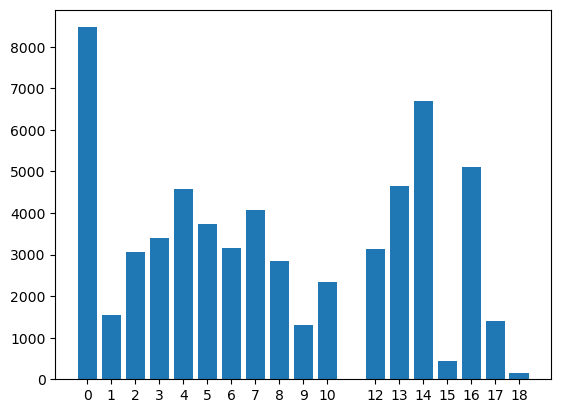

In [53]:
plt.bar(x = dist['label'], height=dist['count'])
plt.xticks(dist['label'])

In [60]:
labels

,images,label
0,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._0,0
1,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._1,0
2,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._2,0
3,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._3,0
4,003feb6e-bbca-11e8-b2bc-ac1f6b6435d0._0,0
...,...,...
60087,8d6602d0-bbca-11e8-b2bc-ac1f6b6435d0._3,9
60088,8d6602d0-bbca-11e8-b2bc-ac1f6b6435d0._4,9
60089,8d6602d0-bbca-11e8-b2bc-ac1f6b6435d0._5,9
60090,8d6602d0-bbca-11e8-b2bc-ac1f6b6435d0._6,9


In [4]:
image_array = []
for j in os.listdir():
    if j != 'cell':
        path = os.path.join(os.getcwd(), j )
        for i in tqdm(os.listdir(path)):
            new_path = os.path.join(path,i)
            new_path = new_path.replace(os.sep,'/')
            img = cv2.imread(f'{new_path}')
            img = cv2.resize(img, (226,226))
            # print(img)
            image_array.append(img)

100%|███████████████████████████████████████████████████████████| 1315/1315 [00:04<00:00, 279.54it/s]


In [47]:
img = cv2.imread('G:/major_project/data/0/002679c2-bbb6-11e8-b2ba-ac1f6b6435d0._0.png')
# img = cv2.resize(img, (300,300))

In [5]:
np.save('images.npy',np.array(image_array))

In [15]:
cv2.imshow('img',image_array[0])
cv2.waitKey(0)

-1

In [9]:
val = pd.read_csv('validation.csv')

In [10]:
names = val.Label.unique()

In [13]:
for i in names:
    os.mkdir(f'.\\validation1\\{i}')

In [20]:
import shutil


In [21]:
for i in os.listdir('.\\validation_cells'):
    try:
        name = i.split('.')[0]
        cat = val[val['ID']==name].iloc[0,1]
        shutil.copy(f'./validation_cells/{i}',f'./validation/{cat}')
    except:
        print(i)


In [18]:
val[val['ID'] == '8e3e33ee-bb9d-11e8-b2b9-ac1f6b6435d0'].iloc[0,1]

2

In [22]:
test = pd.read_csv('test.csv')

In [23]:
names = test.Label.unique()

In [26]:
for i in names:
    os.mkdir(f'./test/{i}')

In [30]:
for i in os.listdir('.\\test_cells'):
    try:
        name = i.split('.')[0]
        cat = test[test['ID']==name].iloc[0,1]
        shutil.copy(f'./test_cells/{i}',f'./test/{cat}')
    except:
        print(i)


In [ ]:
test.drop(test['Label']==11,axis=0, inplace=True)

In [60]:
os.chdir('G:/major_project/validation/')

In [36]:
images = []
labels = []
for i in os.listdir():
    if i != 'cell':
        path = os.path.join(os.getcwd(), i )
        files = os.listdir(path)
        label = [int(i)]
        label = label*len(files)
        images.extend(files)
        labels.extend(label)

In [39]:
labels = pd.DataFrame({'images':images, 'label' : labels})
labels['images']= labels['images'].map(lambda x : x.split('.p')[0])

In [40]:
labels

,images,label
0,8e4ab438-bbbc-11e8-b2ba-ac1f6b6435d0._0,0
1,8e4ab438-bbbc-11e8-b2ba-ac1f6b6435d0._1,0
2,8e4ab438-bbbc-11e8-b2ba-ac1f6b6435d0._2,0
3,8e4ab438-bbbc-11e8-b2ba-ac1f6b6435d0._3,0
4,8e4ab438-bbbc-11e8-b2ba-ac1f6b6435d0._4,0
...,...,...
15820,b0b14f80-bbaf-11e8-b2ba-ac1f6b6435d0._5,9
15821,b0b14f80-bbaf-11e8-b2ba-ac1f6b6435d0._6,9
15822,b0b14f80-bbaf-11e8-b2ba-ac1f6b6435d0._7,9
15823,b0b14f80-bbaf-11e8-b2ba-ac1f6b6435d0._8,9


In [41]:
labels.to_csv('validation.csv')

In [4]:
os.chdir('G:/major_project/test/')

In [45]:
images = []
labels = []
for i in os.listdir():
    if i != 'cell':
        path = os.path.join(os.getcwd(), i )
        files = os.listdir(path)
        label = [int(i)]
        label = label*len(files)
        images.extend(files)
        labels.extend(label)

In [46]:
labels = pd.DataFrame({'images':images, 'label' : labels})
labels['images']= labels['images'].map(lambda x : x.split('.p')[0])

In [47]:
labels.to_csv('test.csv')

In [51]:
from tqdm import tqdm
image_array = []
for j in os.listdir():
    if j != 'tes.csv':
        path = os.path.join(os.getcwd(), j )
        for i in tqdm(os.listdir(path)):
            new_path = os.path.join(path,i)
            new_path = new_path.replace(os.sep,'/')
            img = cv2.imread(f'{new_path}')
            img = cv2.resize(img, (226,226))
            # print(img)
            image_array.append(img)

100%|█████████████████████████████████████████████████████████████| 380/380 [00:02<00:00, 162.62it/s]


NotADirectoryError: [WinError 267] The directory name is invalid: 'G:\\major_project\\test\\test.csv'

In [53]:
np.save('test.npy',np.array(image_array))

In [55]:
from tqdm import tqdm
image_array = []
for j in os.listdir():
    if j != 'validation.csv':
        path = os.path.join(os.getcwd(), j )
        for i in tqdm(os.listdir(path)):
            new_path = os.path.join(path,i)
            new_path = new_path.replace(os.sep,'/')
            img = cv2.imread(f'{new_path}')
            img = cv2.resize(img, (226,226))
            # print(img)
            image_array.append(img)

100%|█████████████████████████████████████████████████████████████| 426/426 [00:01<00:00, 396.02it/s]


In [56]:
len(image_array)

15825

In [61]:
test = []

In [62]:
np.save('validation.npy',np.array(image_array))

In [70]:
t[t['Label']=='11']

,ID,Label
8808,b6a469d8-bbad-11e8-b2ba-ac1f6b6435d0,11


In [3]:
labels = pd.read_csv("G:/major_project/train.csv")

In [3]:
os.chdir("G:/major_project/data/")
X_train = []
y_train = pd.DataFrame(columns=["ID", "label"])
for i in tqdm(os.listdir('./cell')[:5000]):
    try:
        path = f'./cell/{i}'
        lab = i.split(".p")[0]
        id = {'ID' : lab, 'label' : labels[labels['ID'] == lab.split(".")[0]].iloc[0,1]}
        y_train.loc[len(y_train)] = id
        img = cv2.imread(f'{path}')
        img = cv2.resize(img, (224,224))
        img = img.astype(np.float32)
        X_train.append(img/255)
    except:
        print(i)
        

100%|███████████████████████████████████████████████████████████| 5000/5000 [00:40<00:00, 122.60it/s]


In [4]:
np.save('X_train_sample.npy', X_train)

In [5]:
y_train.to_csv("y_trainsample.csv")

In [43]:
y_train

,ID,label
0,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._0,5
1,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._1,5
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._2,5
3,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._3,5
4,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0._4,5
...,...,...
9995,1b4169dc-bbb7-11e8-b2ba-ac1f6b6435d0._2,14
9996,1b4169dc-bbb7-11e8-b2ba-ac1f6b6435d0._3,14
9997,1b4169dc-bbb7-11e8-b2ba-ac1f6b6435d0._4,14
9998,1b4169dc-bbb7-11e8-b2ba-ac1f6b6435d0._5,14


In [ ]:
#resizing and reshaping, using resized_mages, all the train cells in one go and splitting them and saving them.

In [ ]:
os.chdir("G:/major_project/data/cells/")
l = [0,10000, 20000, 30000, 40000,50000, len(os.listdir())]
for j in range(len(l)-1):
    X_train = []
    y_train = pd.DataFrame(columns=["ID", "label"])
    for i in tqdm(os.listdir()[l[j]:l[j+1]]):
        try:
            path = f'{i}'
            lab = i.split(".p")[0]
            id = {'ID' : lab, 'label' : labels[labels['ID'] == lab.split(".")[0]].iloc[0,1]}
            y_train.loc[len(y_train)] = id
            img = cv2.imread(f'{path}')
            img = resize_image(img)
            img = img.astype(np.float32)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X_train.append(img/255)
        except:
            print(i)
    np.save(f'data/train/X_train_{j}.npy', X_train)
    y_train.to_csv(f'data/train/y_train{j}.csv')

In [ ]:
#resizing and reshaping, using resized_mages, all the validation cells in one go and splitting them and saving them.

In [7]:
os.chdir("G:/major_project/validation_cells/")
l = [0,2500, 5000, 7500, 10000,12500, len(os.listdir())]
for j in range(len(l)-1):
    X_val = []
    y_val = pd.DataFrame(columns=["ID", "label"])
    for i in tqdm(os.listdir()[l[j]:l[j+1]]):
        try:
            path = f'{i}'
            lab = i.split(".p")[0]
            id = {'ID' : lab, 'label' : labels[labels['ID'] == lab.split(".")[0]].iloc[0,1]}
            y_val.loc[len(y_val)] = id
            img = cv2.imread(f'{path}')
            img = resize_image(img)
            img = img.astype(np.float32)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X_val.append(img/255)
        except:
            print(i)
    np.save(f'X_val_{j}.npy', X_val)
    y_val.to_csv(f'y_val{j}.csv')
            

100%|███████████████████████████████████████████████████████████| 3337/3337 [00:23<00:00, 140.80it/s]


X_val_0.npy
X_val_1.npy
X_val_2.npy
X_val_3.npy
X_val_4.npy
X_val_5.npy
y_val0.csv
y_val1.csv
y_val2.csv
y_val3.csv
y_val4.csv
y_val5.csv


In [ ]:
#resizing and reshaping, using resized_mages, all the test cells in one go and splitting them and saving them.

In [15]:
os.chdir("G:/major_project/test_Cells/")
l = [0,2500, 5000, 7500, 10000,12500, len(os.listdir())]
for j in range(len(l)-1):
    X_test = []
    y_test = pd.DataFrame(columns=["ID", "label"])
    for i in tqdm(os.listdir()[l[j]:l[j+1]]):
        try:
            path = f'{i}'
            lab = i.split(".p")[0]
            id = {'ID' : lab, 'label' : labels[labels['ID'] == lab.split(".")[0]].iloc[0,1]}
            y_test.loc[len(y_test)] = id
            img = cv2.imread(f'{path}')
            img = resize_image(img)
            img = img.astype(np.float32)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X_val.append(img/255)
        except:
            print(i)
    np.save(f'X_test_{j}.npy', X_test)
    y_test.to_csv(f'y_test{j}.csv')
            

100%|███████████████████████████████████████████████████████████| 3151/3151 [00:24<00:00, 130.67it/s]


In [8]:
cv2.imread('8e48627a-bbc9-11e8-b2bc-ac1f6b6435d0._15.png')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)